In [23]:
!pip install scikit-learn
!pip install sklearn_evaluation
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mistune-3.1.4-py3-none-any.whl.metadata (1.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached fastjsonschema-2.21.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s  0:00:00
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached mistune-3.1.4-py3-none-any.whl (53 kB)
Using cached nbformat-5.10.4-

In [25]:
import pandas as pd #import pandas library for reading CSV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('steel.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('tensile_strength', axis=1),  # Drop the target column from features
    data['tensile_strength'], # Target variable
    test_size=0.5, # 50% test size
    random_state=42) # Random state for reproducibility

print(y_test.head())


548    370.186559
82      85.633609
523    367.949209
332    231.770460
132    311.484573
Name: tensile_strength, dtype: float64


In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor

rgr = GaussianProcessRegressor()
rgr.fit(X_train, y_train)
y_train_pred = rgr.predict(X_train)

print("\n=== Training Data Performance ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}") # Mean Squared Error for training data
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}") # Metric for how well model performs on training data it already saw

y_test_pred = rgr.predict(X_test)
print("\n=== Test Data Performance ===")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}") # Mean Squared Error for test data
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}") # Metric for how well model performs on test data it hasn't seen before


=== Training Data Performance ===
Train MSE: 0.0000
Train R²: 1.0000

=== Test Data Performance ===
Test MSE: 22299.9800
Test R²: -1.6887


In [ ]:
# Perform Feature Scaling

In [49]:

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn_evaluation import plot
 
parameters = {'kernel': [
    WhiteKernel(noise_level=0.5), 
    ConstantKernel(1.0, constant_value_bounds="fixed"),
    ConstantKernel(1.0) * RBF(),
    RBF(),
    DotProduct(),
    DotProduct(sigma_0=1.0, sigma_0_bounds= (1e-5, 1e6))], 
    'alpha': [1e-2, 1e-3, 1e-4, 1e-5]}

rgr = GridSearchCV(GaussianProcessRegressor(), 
                   parameters,
                   cv=5,
                   n_jobs=-1,
                   verbose=2)

# Fit the model
rgr.fit(X_train, y_train)
# plot.grid_search(rgr.cv_results_, change='param_kernel', kind='bar')

# plt.show()

# Print best parameters and score
print(f"Best parameters: {rgr.best_params_}")
print(f"Best CV score: {-rgr.best_score_:.4f}")  # Negative MSE, so negate it

y_train_pred = rgr.predict(X_train)
print("\n=== Training Data Performance ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}") # Mean Squared Error for training data
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}") # Metric for how well model performs on training data it already saw

# y_test_pred = rgr.predict(X_test)
# print("\n=== Test Data Performance ===")
# print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
# print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............................alpha=0.01, kernel=1**2; total time=   0.0s
[CV] END ............................alpha=0.01, kernel=1**2; total time=   0.0s
[CV] END ............................alpha=0.01, kernel=1**2; total time=   0.0s
[CV] END ....alpha=0.01, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ....alpha=0.01, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ....alpha=0.01, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ....alpha=0.01, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ....alpha=0.01, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ............................alpha=0.01, kernel=1**2; total time=   0.0s
[CV] END ............................alpha=0.01, kernel=1**2; total time=   0.0s
[CV] END .............alpha=0.01, kernel=RBF(length_scale=1); total time=   0.1s
[CV] END .............alpha=0.01, kernel=RBF(le

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000.0. Increasi

[CV] END ......alpha=0.01, kernel=1**2 * RBF(length_scale=1); total time=   0.3s
[CV] END ......alpha=0.01, kernel=1**2 * RBF(length_scale=1); total time=   0.4s
[CV] END ...........alpha=0.01, kernel=DotProduct(sigma_0=1); total time=   0.2s
[CV] END ...........alpha=0.01, kernel=DotProduct(sigma_0=1); total time=   0.3s
[CV] END ...alpha=0.001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s


/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 3 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 5 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 5 iteration(s) (status=2):
AB

[CV] END ...........alpha=0.01, kernel=DotProduct(sigma_0=1); total time=   0.3s
[CV] END ...alpha=0.001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...........................alpha=0.001, kernel=1**2; total time=   0.0s
[CV] END ...alpha=0.001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...........................alpha=0.001, kernel=1**2; total time=   0.0s
[CV] END ...........alpha=0.01, kernel=DotProduct(sigma_0=1); total time=   0.4s
[CV] END ...alpha=0.001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...........................alpha=0.001, kernel=1**2; total time=   0.0s
[CV] END ...........................alpha=0.001, kernel=1**2; total time=   0.0s
[CV] END ...........................alpha=0.001, kernel=1**2; total time=   0.0s
[CV] END ...alpha=0.001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...........alpha=0.01, kernel=DotProduct(sigma_0=1); total time=   0.3s
[CV] END ...........alpha=0.

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bou

[CV] END ..alpha=0.0001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ..alpha=0.0001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ..........................alpha=0.0001, kernel=1**2; total time=   0.0s
[CV] END ..alpha=0.0001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ..alpha=0.0001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ..........................alpha=0.0001, kernel=1**2; total time=   0.0s
[CV] END ..........................alpha=0.0001, kernel=1**2; total time=   0.0s
[CV] END ..alpha=0.0001, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ..........................alpha=0.0001, kernel=1**2; total time=   0.0s
[CV] END ..........................alpha=0.0001, kernel=1**2; total time=   0.0s
[CV] END ...........alpha=0.0001, kernel=RBF(length_scale=1); total time=   0.1s
[CV] END ..........alpha=0.001, kernel=DotProduct(sigma_0=1); total time=   0.3s
[CV] END ....alpha=0.0001, k

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 12 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close t

[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END ...........alpha=0.0001, kernel=RBF(length_scale=1); total time=   0.1s
[CV] END ..........alpha=0.001, kernel=DotProduct(sigma_0=1); total time=   0.4s
[CV] END ...........alpha=0.0001, kernel=RBF(length_scale=1); total time=   0.1s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END ...........alpha=0.0001, kernel=RBF(length_scale=1); total time=   0.1s
[CV] END ..........alpha=0.001, kernel=DotProduct(sigma_0=1); total time=   0.4s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END ....alpha=0.0001, kernel=1**2 * RBF(length_scale=1); total time=   0.1s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.1s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.1s
[CV] END ...........alpha=0.

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 0 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 2 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter leng

[CV] END ...alpha=1e-05, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...alpha=1e-05, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ...........................alpha=1e-05, kernel=1**2; total time=   0.0s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.2s
[CV] END .........alpha=0.0001, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END ............alpha=1e-05, kernel=RBF(length_scale=1); total time=   0.0s
[CV] END ...alpha=1e-05, kernel=WhiteKernel(noise_level=0.5); total time=   0.1s
[CV] END ............alpha=1e-05, kernel=RBF(length_scale=1); total time=   0.0s
[CV] END .....alpha=1e-05, kernel=1**2 * RBF(length_scale=1); total time=   0.1s
[CV] END ..........alpha=1e-05, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END .....alpha=1e-05, kernel=1**2 * RBF(length_scale=1); total time=   0.2s
[CV] END ..........alpha=1e-05, kernel=DotProduct(sigma_0=1); total time=   0.0s
[CV] END ...alpha=1e-05, ker

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000

['WhiteKernel(noise_level=0.5)' '1**2' '1**2 * RBF(length_scale=1)'
 'RBF(length_scale=1)' 'DotProduct(sigma_0=1)']


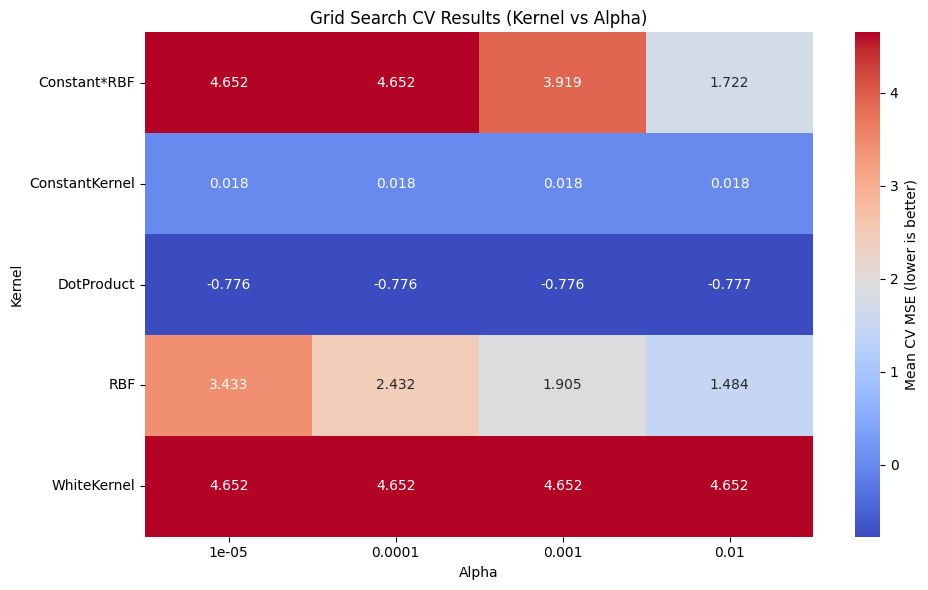

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract all results from GridSearchCV
cv_results = pd.DataFrame(rgr.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results['mean_MSE'] = -cv_results['mean_test_score']

# Convert kernel objects to strings (so they're easy to plot)
cv_results['param_kernel'] = cv_results['param_kernel'].astype(str)
print(cv_results['param_kernel'].unique())

cv_results['param_kernel'] = cv_results['param_kernel'].replace({
    '1**2': 'ConstantKernel',
    '1**2 * RBF(length_scale=1)': 'Constant*RBF',
    'RBF(length_scale=1)': 'RBF',
    'DotProduct(sigma_0=1)': 'DotProduct',
    'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
})


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results.pivot_table(
    values='mean_MSE',
    index='param_kernel',
    columns='param_alpha'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Kernel vs Alpha)")
plt.xlabel("Alpha")
plt.ylabel("Kernel")
plt.tight_layout()
plt.show()


In [54]:

# Using the best values from GridSearchCV to train a final model
import numpy as np 
rgr = GaussianProcessRegressor(alpha=0.01, kernel= DotProduct() )
ConstantKernel(1.0, constant_value_bounds="fixed")
rgr.fit(X_train, y_train)
y_train_pred = rgr.predict(X_train)
print("\n=== Training Data Performance ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}") # Mean Squared Error for training data
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}") # Metric for how well model performs on training data it already saw
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

print("\n=== Test Data Performance ===")
y_test_pred = rgr.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}") # Mean Squared Error for test data
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}") # Metric for how well model performs on test data it hasn't seen before
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


=== Training Data Performance ===
Train MSE: 1471.2621
Train R²: 0.8222
Train RMSE: 38.36

=== Test Data Performance ===
Test MSE: 1952.4308
Test R²: 0.7646
Test RMSE: 44.19


/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
